In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the dataset with proper encoding
df = pd.read_csv('../data/superstore.csv', encoding='latin-1')

# Display basic info
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (9994, 21)

First few rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Check current data types
print("Current data types:")
print(df.dtypes)

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

print("\n" + "="*50)
print("After conversion:")
print(df.dtypes)

# Display the cleaned data
df.head()

Current data types:
Row ID             int64
Order ID             str
Order Date           str
Ship Date            str
Ship Mode            str
Customer ID          str
Customer Name        str
Segment              str
Country              str
City                 str
State                str
Postal Code        int64
Region               str
Product ID           str
Category             str
Sub-Category         str
Product Name         str
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

After conversion:
Row ID                    int64
Order ID                    str
Order Date       datetime64[us]
Ship Date        datetime64[us]
Ship Mode                   str
Customer ID                 str
Customer Name               str
Segment                     str
Country                     str
City                        str
State                       str
Postal Code               int64
Region                      str
Produc

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Get basic statistics
print("Dataset Statistics:")
print(df.describe())

print("\n" + "="*50)
print("\nCategorical Columns Summary:")
print(f"Categories: {df['Category'].unique()}")
print(f"Segments: {df['Segment'].unique()}")
print(f"Regions: {df['Region'].unique()}")
print(f"Ship Modes: {df['Ship Mode'].unique()}")

Dataset Statistics:
            Row ID                  Order Date                   Ship Date  \
count  9994.000000                        9994                        9994   
mean   4997.500000  2016-04-30 00:07:12.259355  2016-05-03 23:06:58.571142   
min       1.000000         2014-01-03 00:00:00         2014-01-07 00:00:00   
25%    2499.250000         2015-05-23 00:00:00         2015-05-27 00:00:00   
50%    4997.500000         2016-06-26 00:00:00         2016-06-29 00:00:00   
75%    7495.750000         2017-05-14 00:00:00         2017-05-18 00:00:00   
max    9994.000000         2017-12-30 00:00:00         2018-01-05 00:00:00   
std    2885.163629                         NaN                         NaN   

        Postal Code         Sales     Quantity     Discount       Profit  
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000  
mean   55190.379428    229.858001     3.789574     0.156203    28.656896  
min     1040.000000      0.444000     1.000000     0

In [7]:
# Extract useful time features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')
df['Quarter'] = df['Order Date'].dt.quarter
df['Day_of_Week'] = df['Order Date'].dt.day_name()

# Calculate profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Display new columns
print("New columns created:")
print(df[['Order Date', 'Year', 'Month', 'Month_Name', 'Quarter', 'Profit Margin']].head())

New columns created:
  Order Date  Year  Month Month_Name  Quarter  Profit Margin
0 2016-11-08  2016     11        Nov        4          16.00
1 2016-11-08  2016     11        Nov        4          30.00
2 2016-06-12  2016      6        Jun        2          47.00
3 2015-10-11  2015     10        Oct        4         -40.00
4 2015-10-11  2015     10        Oct        4          11.25


In [8]:
# Check the date range
print(f"Date Range: {df['Order Date'].min()} to {df['Order Date'].max()}")
print(f"Total Days: {(df['Order Date'].max() - df['Order Date'].min()).days}")
print(f"Years covered: {df['Year'].unique()}")

Date Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
Total Days: 1457
Years covered: [2016 2015 2014 2017]


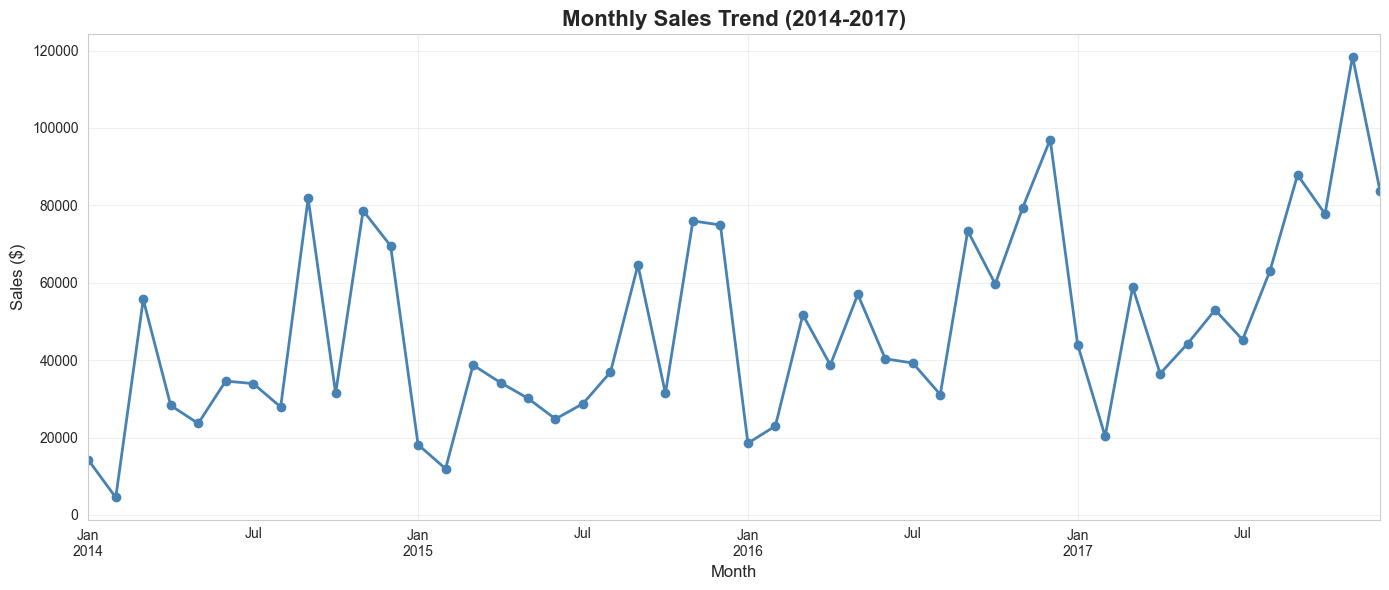

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


In [9]:
# Sales trend over time
sales_by_month = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()

plt.figure(figsize=(14, 6))
sales_by_month.plot(kind='line', marker='o', color='steelblue', linewidth=2)
plt.title('Monthly Sales Trend (2014-2017)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Total Sales: ${df['Sales'].sum():,.2f}")
print(f"Total Profit: ${df['Profit'].sum():,.2f}")
print(f"Overall Profit Margin: {(df['Profit'].sum()/df['Sales'].sum())*100:.2f}%")

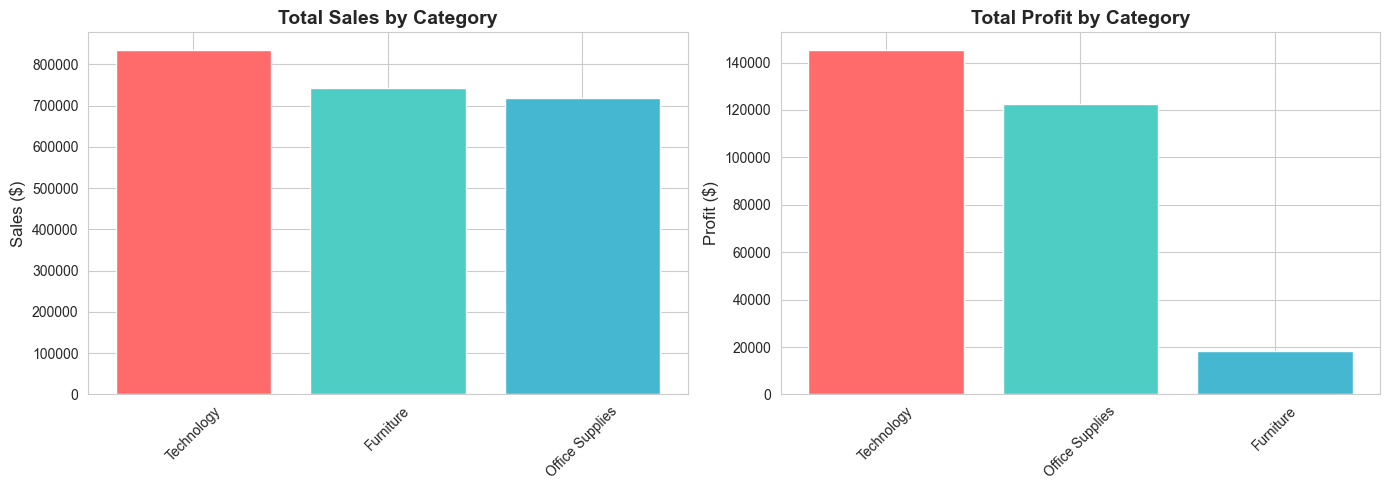

Sales by Category:
Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

Profit by Category:
Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


In [10]:
# Sales and Profit by Category
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
axes[0].bar(category_sales.index, category_sales.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0].set_title('Total Sales by Category', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sales ($)', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Profit by Category
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
axes[1].bar(category_profit.index, category_profit.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1].set_title('Total Profit by Category', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Profit ($)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print details
print("Sales by Category:")
print(category_sales)
print("\nProfit by Category:")
print(category_profit)

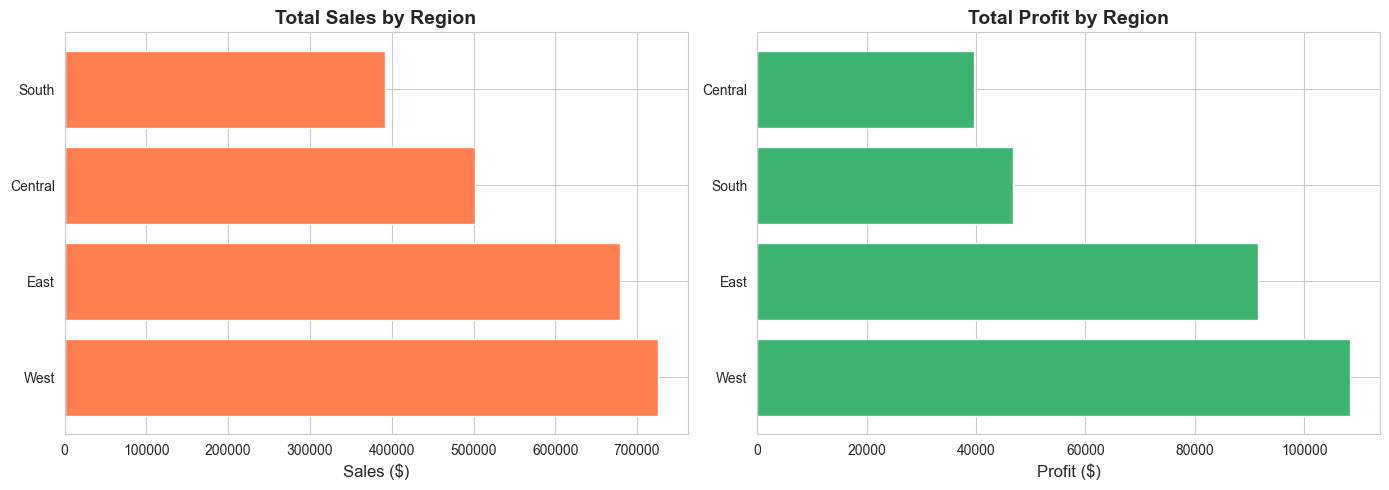

Regional Performance:
West: Sales=$725,457.82, Profit=$108,418.45, Margin=14.94%
East: Sales=$678,781.24, Profit=$91,522.78, Margin=13.48%
Central: Sales=$501,239.89, Profit=$39,706.36, Margin=7.92%
South: Sales=$391,721.91, Profit=$46,749.43, Margin=11.93%


In [11]:
# Sales by Region
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
axes[0].barh(region_sales.index, region_sales.values, color='coral')
axes[0].set_title('Total Sales by Region', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales ($)', fontsize=12)

# Profit by Region
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
axes[1].barh(region_profit.index, region_profit.values, color='mediumseagreen')
axes[1].set_title('Total Profit by Region', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Profit ($)', fontsize=12)

plt.tight_layout()
plt.show()

print("Regional Performance:")
for region in region_sales.index:
    sales = region_sales[region]
    profit = region_profit[region]
    margin = (profit/sales)*100
    print(f"{region}: Sales=${sales:,.2f}, Profit=${profit:,.2f}, Margin={margin:.2f}%")

Performance by Customer Segment:
                    Sales       Profit  Orders  Profit Margin %
Segment                                                        
Consumer     1.161401e+06  134119.2092    5191        11.548050
Corporate    7.061464e+05   91979.1340    3020        13.025506
Home Office  4.296531e+05   60298.6785    1783        14.034269


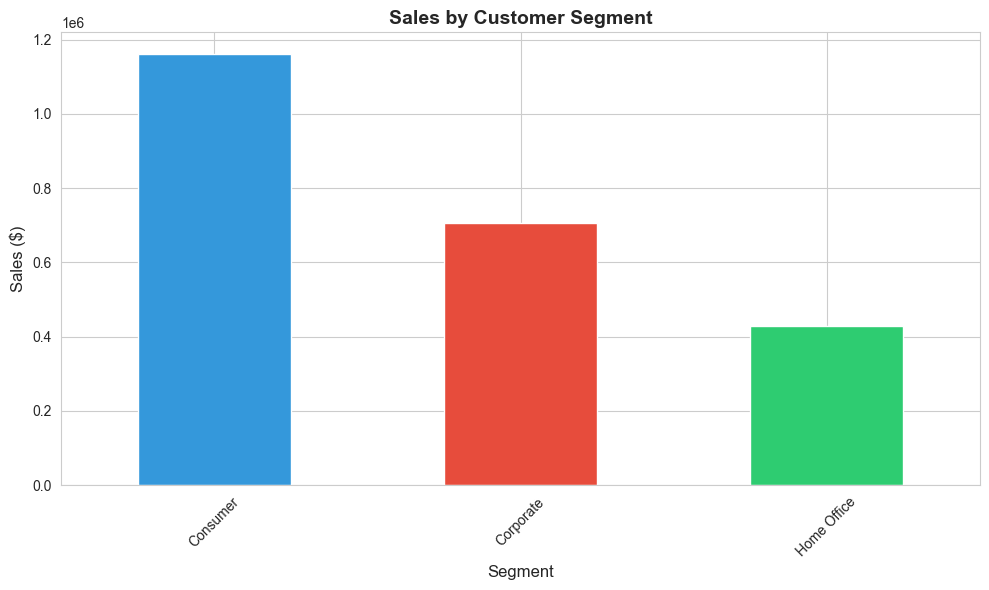

In [12]:
# Segment performance
segment_data = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Orders'})

segment_data['Profit Margin %'] = (segment_data['Profit'] / segment_data['Sales']) * 100

print("Performance by Customer Segment:")
print(segment_data.sort_values('Sales', ascending=False))

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
segment_data['Sales'].plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71'], ax=ax)
ax.set_title('Sales by Customer Segment', fontsize=14, fontweight='bold')
ax.set_ylabel('Sales ($)', fontsize=12)
ax.set_xlabel('Segment', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Impact of Discounts on Profitability:
                 Sales       Profit  Orders  Profit Margin %
Discount                                                    
0.00      1.087908e+06  320987.6032    4798        29.505019
0.10      5.436935e+04    9029.1770      94        16.607108
0.15      2.755852e+04    1418.9915      52         5.149012
0.20      7.645944e+05   90337.3060    3657        11.815063
0.30      1.032267e+05  -10369.2774     227       -10.045155
0.32      1.449346e+04   -2391.1377      27       -16.498047
0.40      1.164178e+05  -23057.0504     206       -19.805437
0.45      5.484974e+03   -2493.1111      11       -45.453472
0.50      5.891854e+04  -20506.4281      66       -34.804712
0.60      6.644700e+03   -5944.6552     138       -89.464614
0.70      4.062028e+04  -40075.3569     418       -98.658490
0.80      1.696376e+04  -30539.0392     300      -180.025221


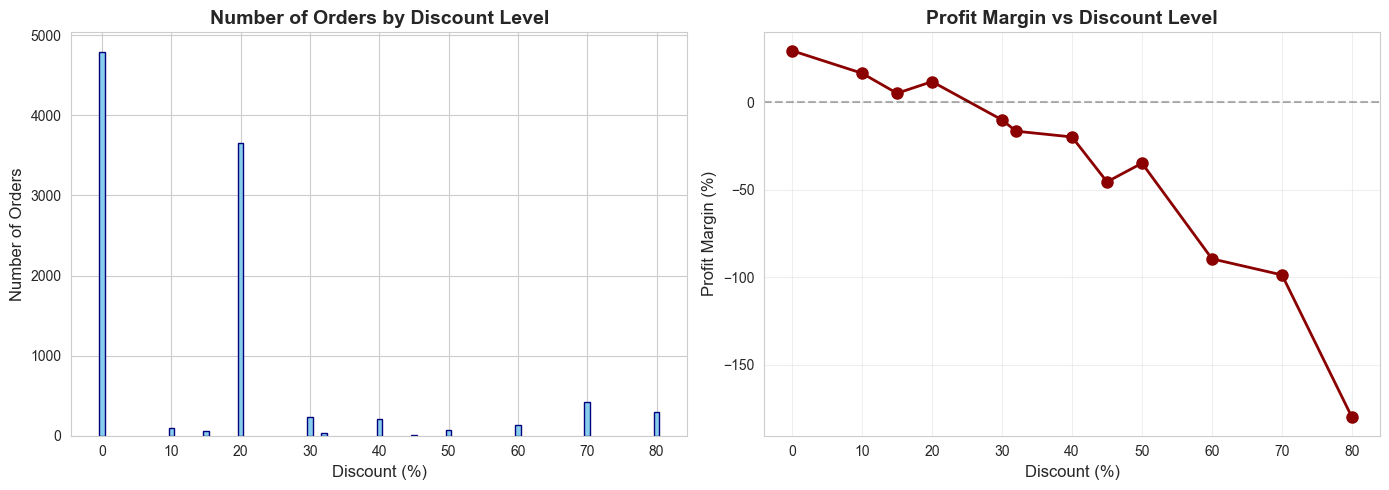

In [13]:
# Analyze discount impact on profit
discount_analysis = df.groupby('Discount').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Orders'})

discount_analysis['Profit Margin %'] = (discount_analysis['Profit'] / discount_analysis['Sales']) * 100

print("Impact of Discounts on Profitability:")
print(discount_analysis.sort_index())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Orders by discount
discount_counts = df['Discount'].value_counts().sort_index()
axes[0].bar(discount_counts.index * 100, discount_counts.values, color='skyblue', edgecolor='navy')
axes[0].set_title('Number of Orders by Discount Level', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Discount (%)', fontsize=12)
axes[0].set_ylabel('Number of Orders', fontsize=12)

# Profit margin by discount
axes[1].plot(discount_analysis.index * 100, discount_analysis['Profit Margin %'], 
             marker='o', linewidth=2, markersize=8, color='darkred')
axes[1].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[1].set_title('Profit Margin vs Discount Level', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Discount (%)', fontsize=12)
axes[1].set_ylabel('Profit Margin (%)', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

TOP 5 Most Profitable Sub-Categories:
                   Sales      Profit  Profit Margin %
Sub-Category                                         
Copiers       149528.030  55617.8249        37.195585
Phones        330007.054  44515.7306        13.489327
Accessories   167380.318  41936.6357        25.054700
Paper          78479.206  34053.5693        43.391837
Binders       203412.733  30221.7633        14.857361

BOTTOM 5 Least Profitable Sub-Categories:
                    Sales      Profit  Profit Margin %
Sub-Category                                          
Machines      189238.6310   3384.7569         1.788618
Fasteners       3024.2800    949.5182        31.396504
Supplies       46673.5380  -1189.0995        -2.547695
Bookcases     114879.9963  -3472.5560        -3.022768
Tables        206965.5320 -17725.4811        -8.564460


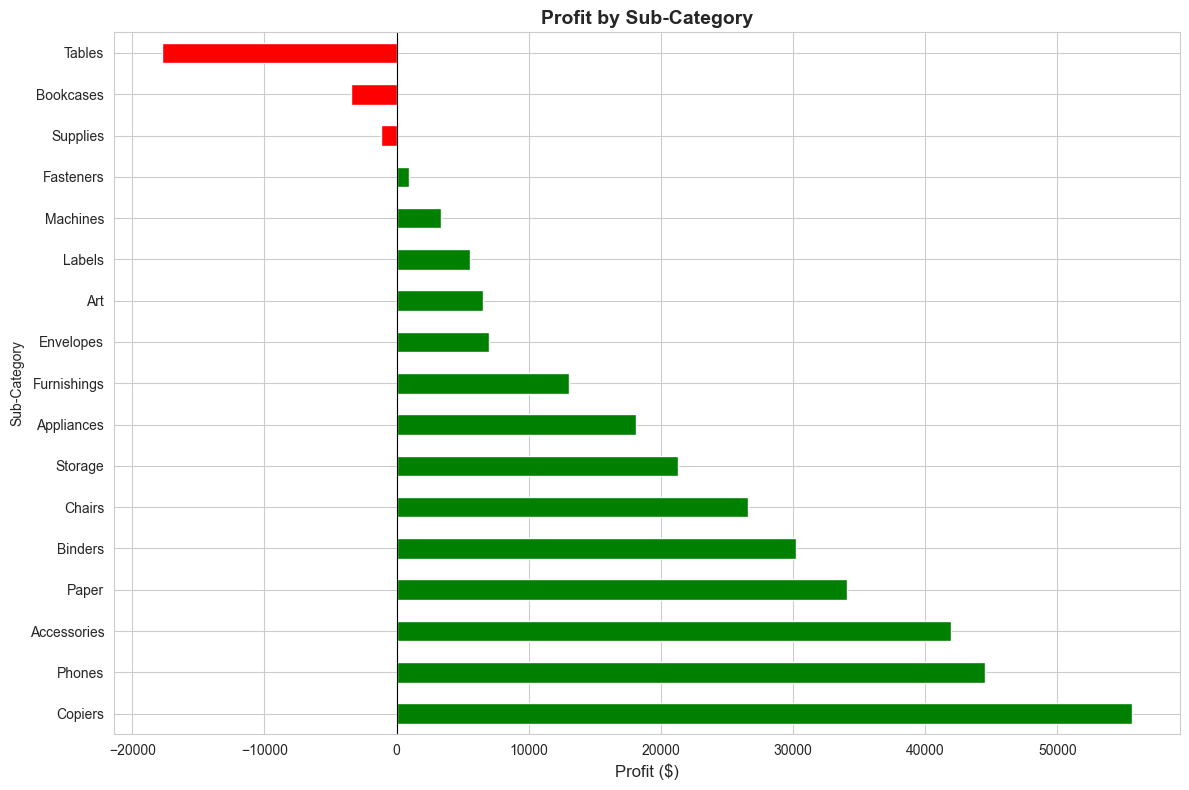

In [14]:
# Top and bottom performing sub-categories
subcat_performance = df.groupby('Sub-Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})
subcat_performance['Profit Margin %'] = (subcat_performance['Profit'] / subcat_performance['Sales']) * 100
subcat_performance = subcat_performance.sort_values('Profit', ascending=False)

# Top 5 and Bottom 5
print("TOP 5 Most Profitable Sub-Categories:")
print(subcat_performance.head())

print("\nBOTTOM 5 Least Profitable Sub-Categories:")
print(subcat_performance.tail())

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in subcat_performance['Profit']]
subcat_performance['Profit'].plot(kind='barh', color=colors, ax=ax)
ax.axvline(x=0, color='black', linewidth=0.8)
ax.set_title('Profit by Sub-Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Profit ($)', fontsize=12)
plt.tight_layout()
plt.show()

Year-over-Year Performance:
            Sales      Profit  Orders  Profit Margin %  Sales Growth %  \
Year                                                                     
2014  484247.4981  49543.9741    1993        10.231126             NaN   
2015  470532.5090  61618.6037    2102        13.095504       -2.832227   
2016  609205.5980  81795.1743    2587        13.426530       29.471521   
2017  733215.2552  93439.2696    3312        12.743771       20.355962   

      Profit Growth %  
Year                   
2014              NaN  
2015        24.371540  
2016        32.744284  
2017        14.235675  


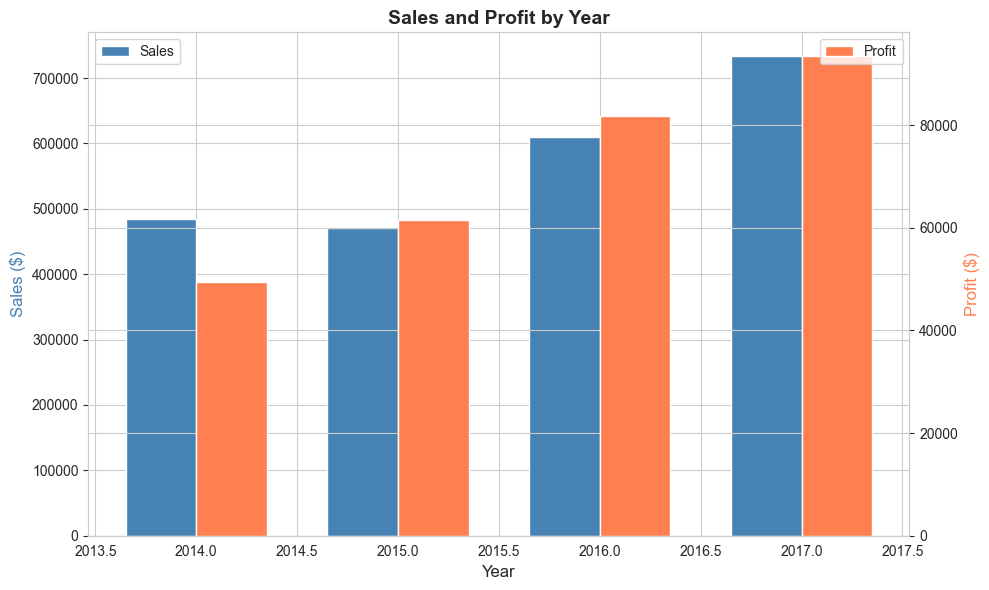

In [15]:
# YoY comparison
yearly_sales = df.groupby('Year').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Orders'})

yearly_sales['Profit Margin %'] = (yearly_sales['Profit'] / yearly_sales['Sales']) * 100

# Calculate growth rates
yearly_sales['Sales Growth %'] = yearly_sales['Sales'].pct_change() * 100
yearly_sales['Profit Growth %'] = yearly_sales['Profit'].pct_change() * 100

print("Year-over-Year Performance:")
print(yearly_sales)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
x = yearly_sales.index
width = 0.35

bars1 = ax.bar(x - width/2, yearly_sales['Sales'], width, label='Sales', color='steelblue')
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, yearly_sales['Profit'], width, label='Profit', color='coral')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Sales ($)', fontsize=12, color='steelblue')
ax2.set_ylabel('Profit ($)', fontsize=12, color='coral')
ax.set_title('Sales and Profit by Year', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [16]:
# Create a summary dictionary for dashboard
summary_metrics = {
    'Total Sales': df['Sales'].sum(),
    'Total Profit': df['Profit'].sum(),
    'Overall Margin': (df['Profit'].sum() / df['Sales'].sum()) * 100,
    'Total Orders': len(df),
    'Average Order Value': df['Sales'].mean(),
    'Best Category': df.groupby('Category')['Profit'].sum().idxmax(),
    'Best Region': df.groupby('Region')['Profit'].sum().idxmax(),
    'Best Segment': df.groupby('Segment')['Profit Margin'].mean().idxmax(),
    'Worst Sub-Category': df.groupby('Sub-Category')['Profit'].sum().idxmin(),
}

print("=" * 60)
print("DASHBOARD KEY METRICS SUMMARY")
print("=" * 60)
for key, value in summary_metrics.items():
    if isinstance(value, (int, float)):
        if 'Margin' in key or 'Average' in key:
            print(f"{key:25s}: ${value:,.2f}")
        else:
            print(f"{key:25s}: {value:,.0f}")
    else:
        print(f"{key:25s}: {value}")
print("=" * 60)

DASHBOARD KEY METRICS SUMMARY
Total Sales              : 2,297,201
Total Profit             : 286,397
Overall Margin           : $12.47
Total Orders             : 9,994
Average Order Value      : $229.86
Best Category            : Technology
Best Region              : West
Best Segment             : Home Office
Worst Sub-Category       : Tables


In [18]:
# Save processed data for dashboard
output_path = '../outputs/processed_data/superstore_processed.csv'
df.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")

# Also save aggregated data for quick dashboard loading
monthly_summary = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'
}).rename(columns={'Order ID': 'Orders'})
monthly_summary.index = monthly_summary.index.to_timestamp()

monthly_summary.to_csv('../outputs/processed_data/monthly_summary.csv')


Processed data saved to: ../outputs/processed_data/superstore_processed.csv
